In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the dataset
file_path = "../dataset/WeatherData.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,CA006158355,"TORONTO CITY, ON CA",2020-01-01,0.3,0.4,0.0,1.1,-1.1
1,CA006158355,"TORONTO CITY, ON CA",2020-01-02,0.0,0.4,3.3,6.1,1.1
2,CA006158355,"TORONTO CITY, ON CA",2020-01-03,0.0,0.4,5.6,7.8,3.3
3,CA006158355,"TORONTO CITY, ON CA",2020-01-04,1.5,0.8,2.2,3.3,0.6
4,CA006158355,"TORONTO CITY, ON CA",2020-01-05,5.6,0.8,0.6,1.7,-1.1


In [3]:
# Drop unnecessary columns (modify this based on your dataset)
df = df.drop(columns=['STATION', 'NAME'], errors='ignore')

# Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Fill missing TAVG using the average of TMIN and TMAX
df['TAVG'].fillna((df['TMIN'] + df['TMAX']) / 2, inplace=True)

# Forward fill any remaining missing values
df.fillna(method='ffill', inplace=True)

# Verify dataset after cleaning
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1823 non-null   datetime64[ns]
 1   PRCP    1823 non-null   float64       
 2   SNWD    1823 non-null   float64       
 3   TAVG    1823 non-null   float64       
 4   TMAX    1823 non-null   float64       
 5   TMIN    1823 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 85.6 KB


/var/folders/yc/rq5fm48550l58cy4j0k3v0d80000gn/T/ipykernel_27680/569336374.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TAVG'].fillna((df['TMIN'] + df['TMAX']) / 2, inplace=True)
/var/folders/yc/rq5fm48550l58cy4j0k3v0d80000gn/T/ipykernel_27680/569336374.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,2020-01-01,0.3,0.4,0.0,1.1,-1.1
1,2020-01-02,0.0,0.4,3.3,6.1,1.1
2,2020-01-03,0.0,0.4,5.6,7.8,3.3
3,2020-01-04,1.5,0.8,2.2,3.3,0.6
4,2020-01-05,5.6,0.8,0.6,1.7,-1.1


In [4]:
# Define features (X) and target (y)
X = df[['PRCP', 'TMAX', 'TMIN']]  # Features
y = df['TAVG']  # Target variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Display shapes to confirm split
X_train.shape, X_test.shape


((1458, 3), (365, 3))

In [5]:
# Initialize models
lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train Linear Regression model
start_time = time.time()
lin_reg.fit(X_train, y_train)
lin_train_time = time.time() - start_time

# Train KNN model
start_time = time.time()
knn_reg.fit(X_train, y_train)
knn_train_time = time.time() - start_time


In [6]:
# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_knn = knn_reg.predict(X_test)

# Evaluate Linear Regression
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

# Evaluate KNN
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

# Display results
baseline_results = pd.DataFrame({
    "Model": ["Linear Regression", "KNN (k=5)"],
    "MSE": [lin_mse, knn_mse],
    "R² Score": [lin_r2, knn_r2],
    "Training Time (s)": [lin_train_time, knn_train_time],
})

# Show the results
print(baseline_results)


               Model       MSE  R² Score  Training Time (s)
0  Linear Regression  1.022808   0.98915           0.015747
1          KNN (k=5)  1.356516   0.98561           0.002533


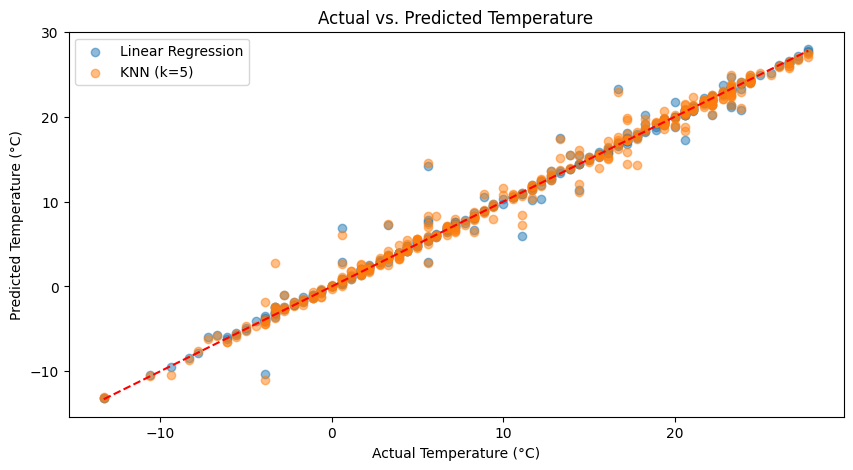

In [7]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lin, label="Linear Regression", alpha=0.5)
plt.scatter(y_test, y_pred_knn, label="KNN (k=5)", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--") # 45-degree line
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.title("Actual vs. Predicted Temperature")
plt.show()


MILESTONE II:

In [11]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/f5/b6/653a70910739f127adffbefb688ebc22b51139292757de7c22b1e04ce792/xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata
  Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl (1.9 MB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [12]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [13]:
# Initialize models
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train Random Forest
import time
start_time = time.time()
rf_reg.fit(X_train, y_train)
rf_train_time = time.time() - start_time

# Train XGBoost
start_time = time.time()
xgb_reg.fit(X_train, y_train)
xgb_train_time = time.time() - start_time


In [15]:
!pip install ace_tools

  Obtaining dependency information for ace_tools from https://files.pythonhosted.org/packages/27/c4/402d3ae2ecbfe72fbdcb2769f55580f1c54a3ca110c44e1efc034516a499/ace_tools-0.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Predictions
y_pred_rf = rf_reg.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate models
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Collect results
advanced_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MSE": [rf_mse, xgb_mse],
    "R² Score": [rf_r2, xgb_r2],
    "Training Time (s)": [rf_train_time, xgb_train_time],
})

# Display the results
from IPython.display import display
display(advanced_results)  # Shows a nice table


,Model,MSE,R² Score,Training Time (s)
0,Random Forest,1.174120,0.987545,0.154078
1,XGBoost,1.239954,0.986846,0.084754


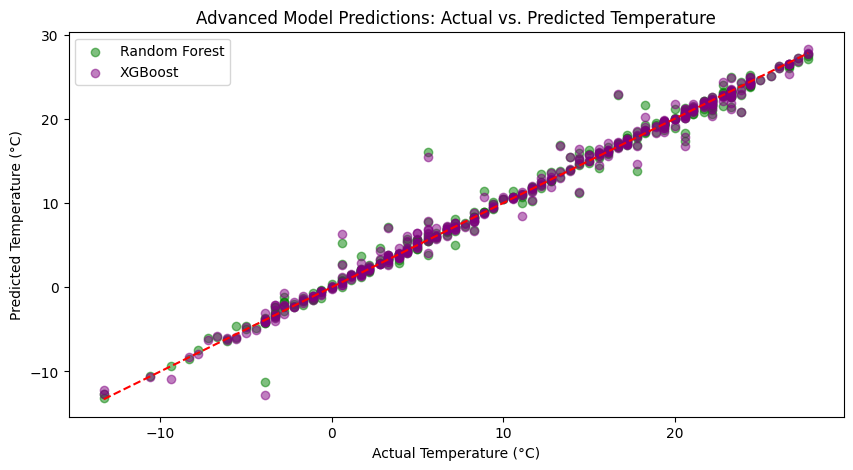

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.5, color='green')
plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.5, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--") # 45-degree line
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.title("Advanced Model Predictions: Actual vs. Predicted Temperature")
plt.show()
